In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("iris.csv")
# data_original = data.copy()
data=data.drop("Id" , axis=1)

In [3]:
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data["Species"]=data["Species"].map({'Iris-setosa':0.0,'Iris-virginica':1.0, 'Iris-versicolor':2.0})

In [5]:
x = data.drop('Species', axis=1).values
y=data['Species'].values

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x_scaler=scaler.transform(x)


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y, test_size=0.2 , random_state=42)

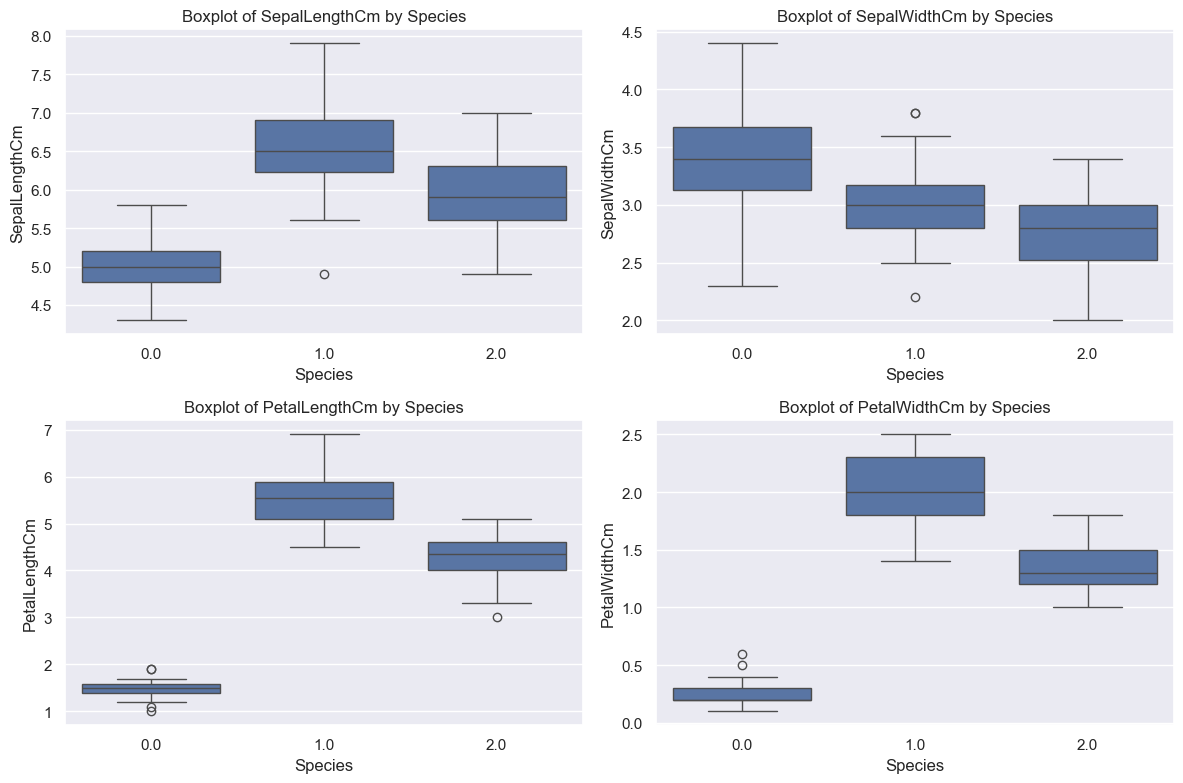

In [8]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Species', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [9]:
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [10]:
def accuracy(y_pred,y_train):
    correct=0
    total=y_train.shape[0]
    predicted_classes = y_pred.argmax(dim=1)  
    correct = (predicted_classes == y_train).sum().item() 

    return (correct/total*100)
        
    
        

In [11]:
class Model(nn.Module):
    def __init__(self , in_features=4 , h1=16 , out_features=3):
        super().__init__()
        self.fc1=nn.Linear(in_features , h1)
        self.out = nn.Linear(h1, out_features)

    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=self.out(x)
        return x

model=Model()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    

In [12]:
epoches = 100
losses=[]
acc=[]
for i in range(epoches):
    y_pred=model.forward(x_train)
    loss=criterion(y_pred,y_train)
    losses.append(loss.detach().numpy())
    acc.append(accuracy(y_pred,y_train))

    if((i+1)%10==0):
        print(f"loss after {i+1}th epoche is {loss:.3f}")
        print(f"accuracy after {i+1}th epoche is {accuracy(y_pred,y_train):.3f}")
        
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

loss after 10th epoche is 0.708
accuracy after 10th epoche is 82.500
loss after 20th epoche is 0.478
accuracy after 20th epoche is 79.167
loss after 30th epoche is 0.349
accuracy after 30th epoche is 85.000
loss after 40th epoche is 0.275
accuracy after 40th epoche is 90.833
loss after 50th epoche is 0.215
accuracy after 50th epoche is 94.167
loss after 60th epoche is 0.166
accuracy after 60th epoche is 96.667
loss after 70th epoche is 0.131
accuracy after 70th epoche is 95.833
loss after 80th epoche is 0.107
accuracy after 80th epoche is 95.833
loss after 90th epoche is 0.090
accuracy after 90th epoche is 95.833
loss after 100th epoche is 0.080
accuracy after 100th epoche is 96.667


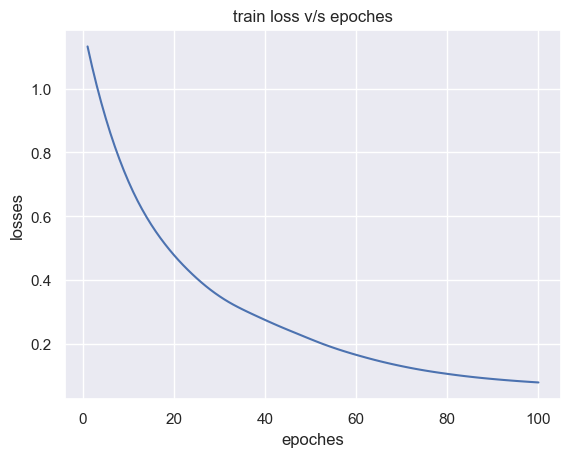

In [13]:
epo= [ i for i in range(1,101,1)]
plt.plot(epo , losses)
plt.xlabel("epoches")
plt.ylabel("losses")
plt.title("train loss v/s epoches")
plt.show()

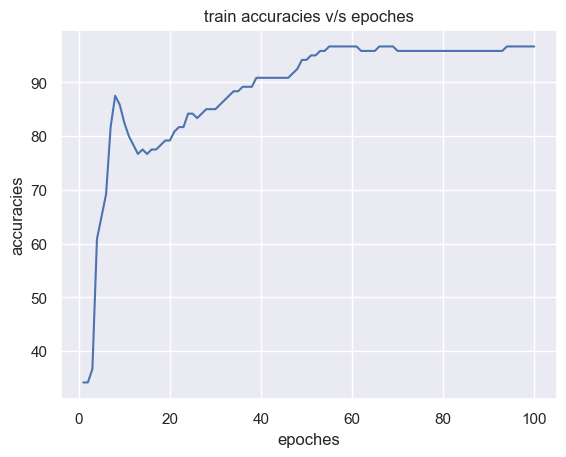

In [14]:

plt.plot(epo , acc)
plt.xlabel("epoches")
plt.ylabel("accuracies")
plt.title("train accuracies v/s epoches")
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
y_pred_test = model(x_test) 
y_pred_classes = torch.argmax(y_pred_test, axis=1) 

# Compute confusion matrix
cm = confusion_matrix(y_test.numpy(), y_pred_classes.numpy())

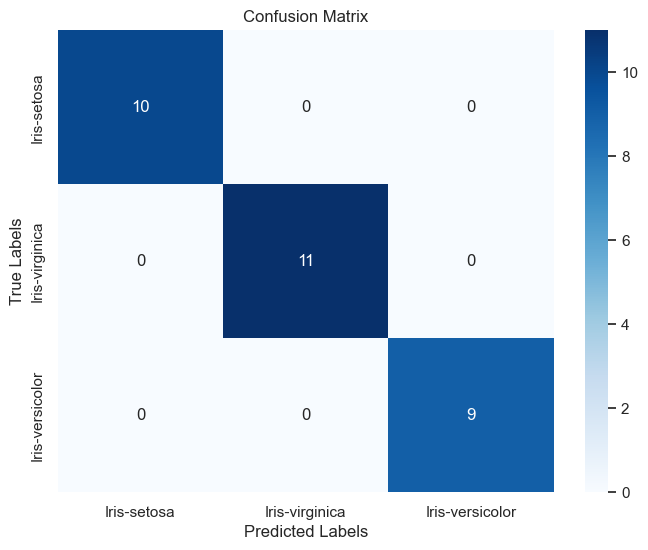

In [18]:
class_labels = ["Iris-setosa", "Iris-virginica", "Iris-versicolor"]  # Example for 3 classes

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()